# Статистика, DS-поток
## Задание SP.1

**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания получат штраф.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.


**Баллы за задание:**

* Задача 1 &mdash; 50 баллов
* Задача 2 &mdash; 20 баллов
* Задача 3 &mdash; 50 баллов
* Задача 4 &mdash; 80 баллов

**Важность задач:**

* *высокая:* задачи 3;
* *средне-высокая:* задачи 1, 4;
* *обычная* задачи 2.

Степень важности задач не связана с количеством баллов и определяется только на основе оценки полезности задачи с точки зрения усвоения текущего и дальнейшего материала. Например, если вы что-то не успеваете, рекомендуется в первую очередь выполнять более важные задачи.

In [1]:
# Bot check

# HW_ID: ds_sp1
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [8]:
import numpy as np
import pandas as pd
import scipy.stats as sps

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(palette='Set2')

---
## Задача 1.

Реализуйте метод Монте-Карло и метод прямоугольников численного интегрирования функций, используя приведенный ниже шаблон. Реализация должна уметь оценивать интегралы вида
$$ \int\limits_{\ell_1}^{h_1} ... \int\limits_{\ell_d}^{h_d} f(x_1, ... , x_d)\ dx_1 ... dx_d $$
для произвольной заданной функции $f$.

Реализация получает на вход векторы $\ell = (\ell_1, ... , \ell_d)$ и $h = (h_1, ... ,h_d)$, а также число $n$ &mdash; количество итераций оценки интеграла. В случае метода прямоугольников число итераций равно количеству используемых прямоугольников, а в случае метода Монте-Карло &mdash; размеру генерируемой выборки. 

*Требования:*
1. Значение функции $f$ можно посчитать только в $n$ точках.
2. Реализация не должна использовать какие-либо циклы, кроме циклов по числу интегралов $d$.
3. Для ускорения вычислений генерацию случайных чисел стоит производить с помощью `numpy.random`.
4. При реализации метода прямоугольников используйте равномерное разбиение по каждой координатной оси.

*Подсказка:* при реализации метода Монте-Карло обрати внимание на один из примеров с лекции.

Для быстрой работы метода прямоугольников используйте функцию <a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html">`numpy.meshgrid`</a>. Ниже есть пример ее использования. 

In [3]:
# Предположим, мы хотим получить координаты всех целых точек (x, y), 
# таких, что x лежит в промежутке [5, 6], а y - в промежутке [-3, -1]

linspace_x = [5, 6]  
linspace_y = [-3, -2, -1]

# возвращает матрицы с координатами сетки,
# задаваемой проекциями точек на оси координат
X, Y = np.meshgrid(linspace_x, linspace_y)

print("X: ", X)  # linspace_x повторилась len(linspace_y) раз по оси 0
print("Y: ", Y)  # linspace_y повторилась len(linspace_x) раз по оси 1

# преобразуем исходный формат к вектору точек
np.stack([X, Y]).reshape(2, -1).T

X:  [[5 6]
 [5 6]
 [5 6]]
Y:  [[-3 -3]
 [-2 -2]
 [-1 -1]]


array([[ 5, -3],
       [ 6, -3],
       [ 5, -2],
       [ 6, -2],
       [ 5, -1],
       [ 6, -1]])

In [12]:
np.stack(np.meshgrid(*(np.linspace([0,1], [2,3], num=int(3 ** 0.5)).T))).reshape(2, -1).T

array([[0., 1.]])

In [4]:
def sliding_window(a, length):
    """
    Функция, возвращающая список скользящих окон по массиву

    Аргументы:
    a --- массив
    length --- длина скользящего окна

    Возвращает матрицу, где в каждой строке скользящее окно, начинающееся с соответствующего индекса
    """
    len_st = len(a) - length + 1
    op1 = np.expand_dims(np.arange(length), axis=0)
    op2 = np.expand_dims(np.arange(len_st), axis=1)
    return a[op1 + op2]

In [24]:
class Integrator:
    
    @staticmethod
    def integrate(func, low, high, n_iter, method="rectangle"):
        """
        Оценка определенного интеграла.
        
        Аргументы:
        f --- векторная функция d-мерной переменной.
            Реализация функции на вход принимает матрицу (n, d),
            где n - число точек, в которых нужно вычислить функцию,
            а d - размерность пространства переменных.
            Функция должна вернуть вектор размерности n.
        low, high --- нижние и верхние пределы интегрирования,
            векторы размера d. Передаются в том же порядке,
            в котором функция принимает аргументы.
        n --- максимальное число вызовов функции f.
        method --- метод ("rectangle" или "monte_carlo").
                            
        Возвращает приближенное значение интеграла.
        """
        
        assert len(low) == len(high)
        low, high = map(np.array, [low, high])
        n_iter = int(n_iter)

        return Integrator.methods[method](func, low, high, n_iter)
    
    
    def integrate_monte_carlo(func, low, high, n_iter):
        """Метод монте-карло"""
        x = np.random.uniform(low, high, size=(n_iter, len(low)))
        y = func(x)
        return np.prod(high - low) * np.average(y)
    
    
    def integrate_rectangle(func, low, high, n_iter):
        """Метод прямоугольников"""
        dim = len(low)
        n_line = int(n_iter ** (1 / dim))

        low, high = np.array(low), np.array(high)
        diff = (high - low) / n_line
        start, end = low + diff / 2, high - diff / 2

        x = np.linspace(start, end, num=n_line, endpoint=True).T
        x = np.stack(np.meshgrid(*x)).reshape(len(low), -1).T
        y = func(x)
        return np.sum(y) * np.prod(high - low) / n_iter
    
    
    methods = {
        "rectangle": integrate_rectangle,
        "monte_carlo": integrate_monte_carlo
    }

Исследуем работу реализованных методов по оценке интеграла
$$\int\limits_0^1 ... \int\limits_0^1 \sum_{i=1}^{d} x_i^2 \prod_{i=1}^{d}dx_i,$$
то есть интегралы вида $\int\limits_0^1 x_1^2\ dx_1$, $\int\limits_0^1 \int\limits_0^1 \left( x_1^2 + x_2^2 \right)\ dx_1 dx_2$ и так далее.

Посчитайте точное значение этого интеграла в зависимости от $d$ теоретически.

$$
F(x_1,...,x_d)=C+\frac{1}{3}\sum_{i=1}^d x_i^3 \prod_{j=1\\ j\neq i}^d x_j
$$

Воспользуемся методом математической индукции, чтобы доказать это.

База индукции: при $d=1$ получим $F(x)=\frac{x^3}{3}+C$.

Переход:

$$
\int ... \int (x_1^2+...+x_d^2) dx_1...dx_d=\int ... \left(\int x_1^2 dx_1+\int (x_2^2+...+x_d^2)dx_1\right)dx_2...dx_d=\int...\int \frac{x_1^3}{3} dx_2...dx_d + x_1\int...\int \left(x_2^2+...+x_n^2\right)dx_2...dx_d=\\
=\frac{x_1^3}{3}x_2...x_d+x_1\int...\int\left(x_2^2+...+x_n^2\right)dx_2...dx_d=\frac{x_1^3}{3}x_2...x_d+C+\frac{1}{3}\sum_{i=2}^d x_i^3 \prod_{j=2\\ j\neq i}^d x_j=C+\frac{1}{3}\sum_{i=1}^d x_i^3 \prod_{j=1\\ j\neq i}^d x_j=\frac{1}{3}\prod_{i=1}^d x_i \sum_{i=1}^d x_i^2
$$

Для нашего случая остаётся вычислить $F(1,...,1)-F(0,...,0)$

$$
F(1,...,1)=\frac{d}{3}\qquad F(0,...,0)=0\qquad F(1,...,1)-F(0,...,0)=\frac{d}{3}
$$

In [23]:
def F(x):
    return 1 / 3 * np.prod(x) * np.sum(x ** 2)

float(F(np.zeros((2, )) + 1) - F(np.zeros((2, ))))

0.6666666666666666

Вычислите $\int\limits_0^1 \int\limits_0^1 \left(x^2 + y^2\right)\ dxdy$ на миллионе запусков функции $f(x, y) = x^2+y^2$ двумя рассмотренными методами. Измерьте время работы методов и сравните результат с истинными значением интеграла. Различается ли время работы методов? Объясните результаты с точки зрения теории.

In [25]:
def f(x):
    return np.sum(x ** 2, axis=1)

In [26]:
%time
print("Monte carlo:", Integrator.integrate(f, [0, 0], [1, 1], 1000000, method="monte_carlo"))

CPU times: user 5 μs, sys: 1 μs, total: 6 μs
Wall time: 10 μs
Monte carlo: 0.6667573452963536


In [22]:
%time
print("Rectangle:", Integrator.integrate(f, [0, 0], [1, 1], 1000000, method="rectangle"))

CPU times: user 6 μs, sys: 0 ns, total: 6 μs
Wall time: 12.9 μs
Rectangle: 0.6666664999999996


Сравним скорость сходимости методов семпирования для $d = 1...8$. Для этого для каждого $d$ постройте график зависимости оценки двумя методами значения интеграла от количества итераций $n$. Рекомендуется рассмотреть значения $n$ вплоть до $d \times 1000$.

Аналогично сравните время работы методов.

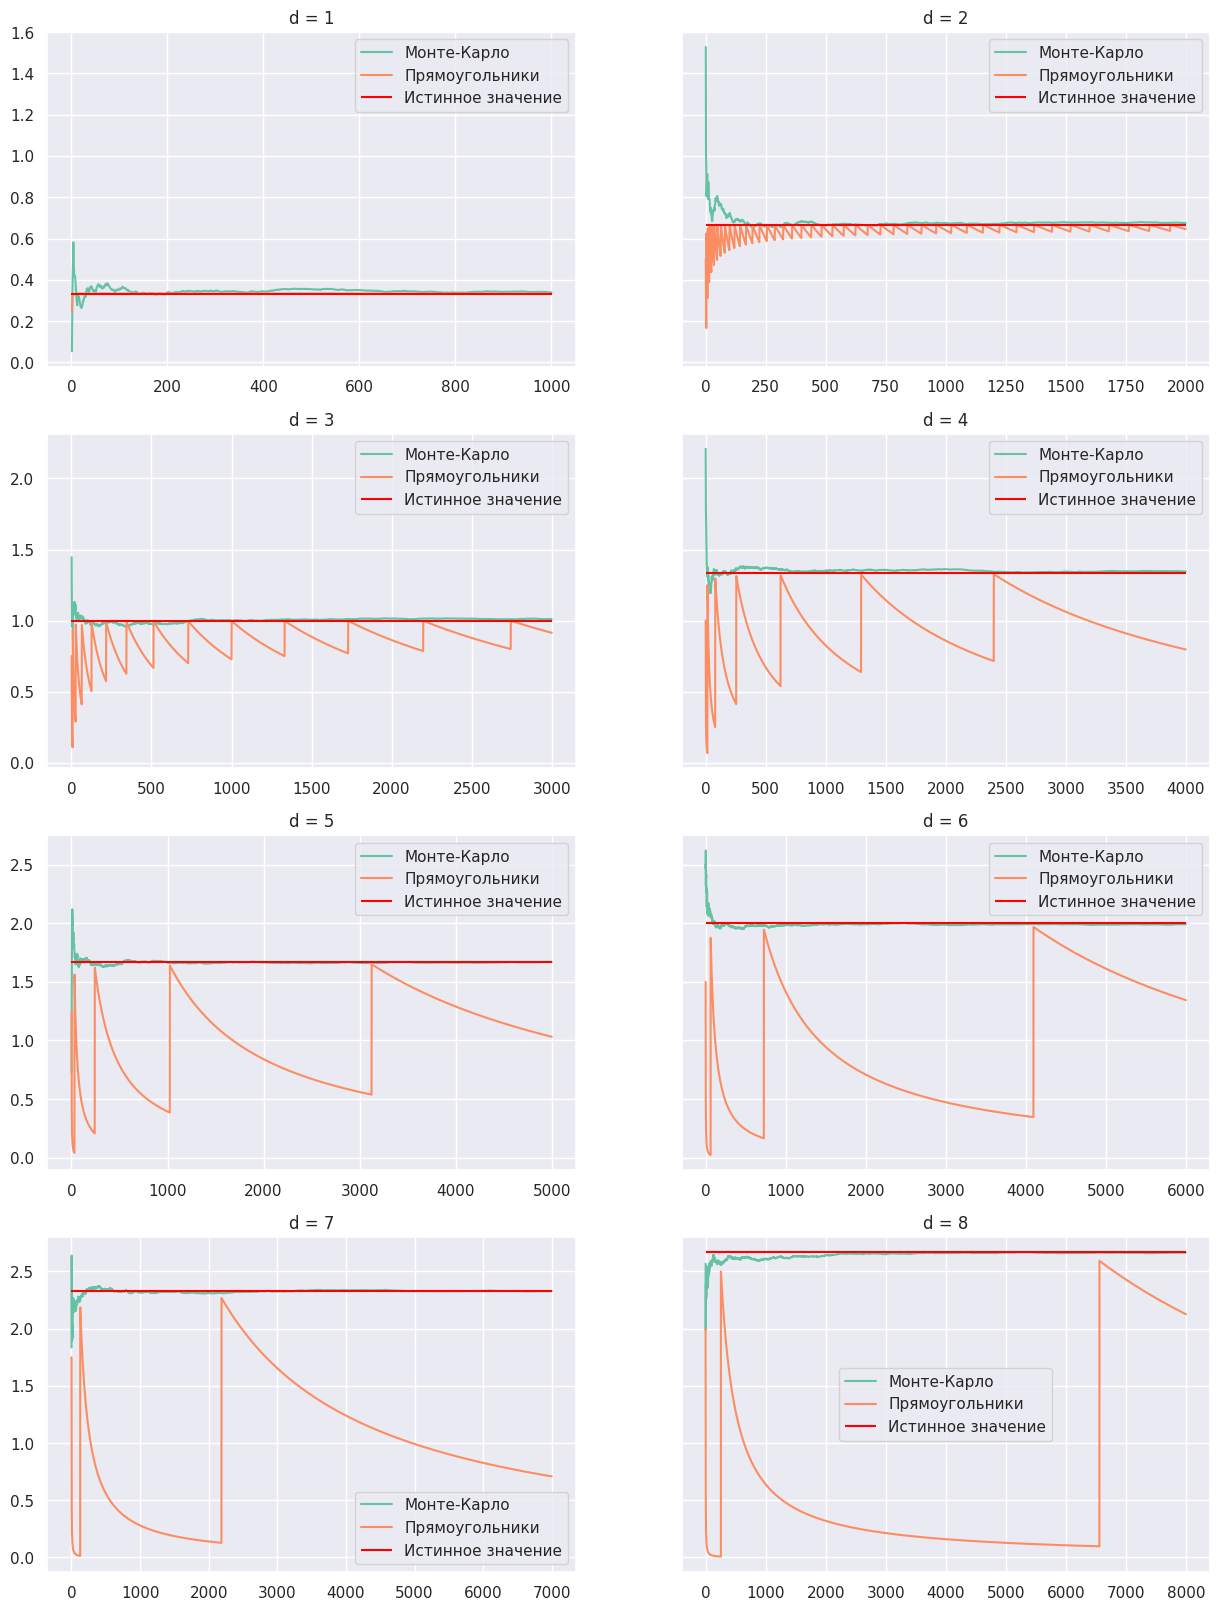

In [30]:
figure, axis = plt.subplots(4, 2, sharey='row')
figure.set_size_inches(15, 20)

y_monte = []
y_rect = []

for d in range(1, 9):
    x = np.random.uniform([0.0] * d, [1.0] * d, (d * 1000, d))
    y_monte.append([])
    y_rect.append([])
    for n in range(1, d * 1000 + 1):
        y_monte[d - 1].append(np.average(np.sum(x[:n, :] ** 2, axis=1)))
        y_rect[d - 1].append(Integrator.integrate(f, [0] * d, [1] * d, n))
    axis[(d - 1) // 2, (d - 1) % 2].plot(np.arange(1, d * 1000 + 1), y_monte[d - 1], label='Монте-Карло')
    axis[(d - 1) // 2, (d - 1) % 2].plot(np.arange(1, d * 1000 + 1), y_rect[d - 1], label='Прямоугольники')
    axis[(d - 1) // 2, (d - 1) % 2].hlines(d / 3, 0, d * 1000 + 1, color='red', label='Истинное значение')

    axis[(d - 1) // 2, (d - 1) % 2].set_title(f'd = {d}')
    axis[(d - 1) // 2, (d - 1) % 2].legend()

plt.show()

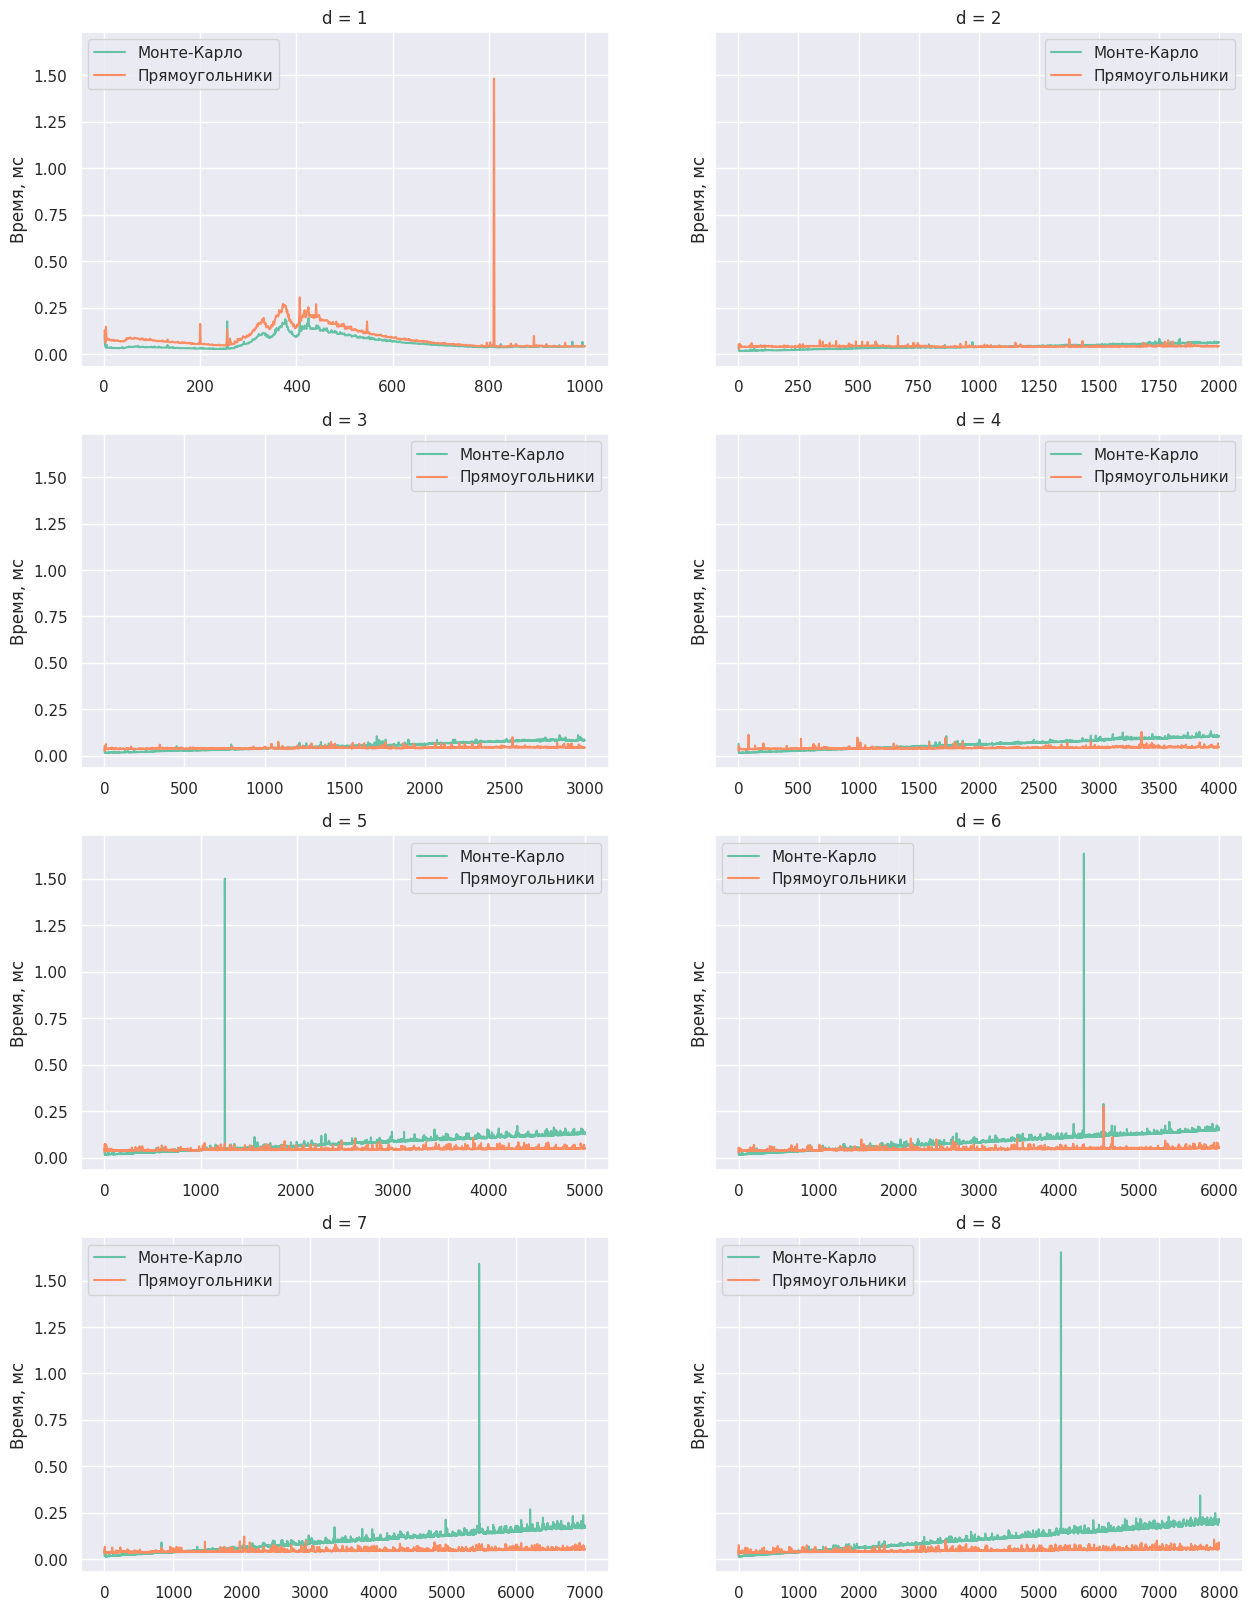

In [36]:
from time import process_time

figure, axis = plt.subplots(4, 2, sharey=True)
figure.set_size_inches(15, 20)

time_monte = []
time_rect = []

for d in range(1, 9):
    x = np.random.uniform([0.0] * d, [1.0] * d, (d * 1000, d))
    time_monte.append([])
    time_rect.append([])
    for n in range(1, d * 1000 + 1):
        start_time = process_time()
        Integrator.integrate(f, [0, 0], [1, 1], n, method="monte_carlo")
        monte_time = process_time()
        Integrator.integrate(f, [0, 0], [1, 1], n, method="rectangle")
        rect_time = process_time()
        time_rect[d - 1].append((rect_time - monte_time) * 1000)
        time_monte[d - 1].append((monte_time - start_time) * 1000)
    axis[(d - 1) // 2, (d - 1) % 2].plot(np.arange(1, d * 1000 + 1), time_monte[d - 1], label='Монте-Карло')
    axis[(d - 1) // 2, (d - 1) % 2].plot(np.arange(1, d * 1000 + 1), time_rect[d - 1], label='Прямоугольники')
    axis[(d - 1) // 2, (d - 1) % 2].set_title(f'd = {d}')
    axis[(d - 1) // 2, (d - 1) % 2].set_ylabel('Время, мс')
    axis[(d - 1) // 2, (d - 1) % 2].legend()

plt.show()

Какой метод и при каких $d$ сходится быстрее? Предположите, в каком случае выгоднее использовать тот или иной метод. С чем связано такое поведение графиков?

**Вывод:** Метод Монте-Карло существенно быстрее сходится к результатам при любых $d$ больше 1 (в последнем случае быстрее сходится метод прямоугольников). В случае метода прямоугольников график приобретает "пилообразную" форму, что, вероятно, связано с необходимостью при равномерном распределении точек в пространствах размерности больше 1 извлекать корни степени $d$ -- скачки соответствуют целым числам, возведённым в степень $d$. Однако, с другой стороны при больших $n$ и $d$ метод прямоугольников работает быстрее - что связано с необходимостью генерировать точки в методе Монте-Карло. Таким образом, при больших размерностях и возможности сделать большое число итераций лучше метод прямоугольников, иначе - метод Монте-Карло.

---
## Задача 2.

Оценим константу плотности нормального распределения с помощью численного интегрирования. Тем самым, необходимо оценить интеграл
$$\int\limits_{\mathbb{R}^d} \exp \left( - \frac12 x^Tx \right) dx.$$
При домножении интеграла на эту константу должна получиться единица.

Чему равно истинное значение этой константы?

$$
\frac{1}{(2\pi)^\frac{d}{2}}
$$

Прежде чем переходить к оценке, поразмышляйте над следующими вопросами.
1. Что будет, если выбрать слишком большие пределы в методе Монте-Карло? 
2. Что может произойти, если выбрать слишком большие пределы в методе прямоугольников?
3. Что будет, если выбрать слишком маленькие пределы?
4. Какие пределы кажутся оптимальными и почему?

**Ответ:**

1. В таком случае почти все значения функции плотности окажутся околонулевыми, и математическое ожидание будет оценено неверно.
2. При больших пределах увеличиваются и длины отрезков, в результате чего при равномерном выборе точек мы получим попадание в окрестность нуля с большим значением функции - как следствие, завышенное значение интеграла.
3. Если мы зададим маленькие пределы, то уменьшатся и длины отрезков, и получим много точек с небольшим значением функции - как следствие, заниженным интегралом.
4. Оптимальными кажутся пределы $[-3;3]^d$, т.к. вероятность попасть в эти пределы практически равна 1, но при этом большая часть значений функции плотности существенно отличаются от 0.

Сравните результаты работы методов для случаев
* оптимальных пределов,
* слишком больших пределов,
* слишком маленьких пределов.

*Подсказка:* здесь достаточно несколько раз применить написанную ранее реализацию и сделать вывод.

Метод Монте-Карло:

In [40]:
from math import pi

def density(x):
    return np.exp(-0.5 * np.apply_along_axis(np.sum, 1, x ** 2))

print('Optimal:', 1 / Integrator.integrate(density, [-3], [3], 100000, method='monte_carlo'))
print('Large:', 1 / Integrator.integrate(density, [-10000], [10000], 100000, method='monte_carlo'))
print('Small:', 1 / Integrator.integrate(density, [-1], [1], 100000, method='monte_carlo'))
print('True:', 1 / np.sqrt(2 * pi))

Optimal: 0.3983482653446452
Large: 0.33842842012834584
Small: 0.5842831436211529
True: 0.3989422804014327


Метод прямоугольников:

In [43]:
print('Optimal:', 1 / Integrator.integrate(density, [-3], [3], 100000, method='rectangle'))
print('Large:', 1 / Integrator.integrate(density, [-1000000], [1000000], 100000, method='rectangle'))
print('Small:', 1 / Integrator.integrate(density, [-1], [1], 100000, method='rectangle'))
print('True:', 1 / np.sqrt(2 * pi))

Optimal: 0.40002225891968485
Large: 1.2961763821467682e+20
Small: 0.5843685672499126
True: 0.3989422804014327


**Вывод:** при правильном подборе пределов значение константы, полученное методом численного интегрирования, оказалось близким к истинному значению. При слишком маленьких значениях пределов вычисленное значение оказывается существенно больше нужного, а при слишком больших может отклоняться в любую сторону или быть точным.

---
## Задача 3.

Некоторая ML-модель имеет один параметр $\theta$, который обучается посредством *максимизации* функции
$$\mathcal{L}(\theta) = \mathsf{E} \exp\left(-\frac{\xi^2\sqrt{\eta}}{1+\theta^2}\right),$$
где $\xi$ имеет стандартное нормальное распределение, а $\eta$ &mdash; пуассоновское распределение с параметром 5 и не зависит от $\eta$.


Оптимизируйте эту функцию, используя стохастический градиентный спуск.

*Подсказка.* Обрати внимание на один из примеров с лекции. Кроме того, заметим, что класс из задачи 1 не подойдет для решения этой задачи. Достаточно написать семплирование непосредственно для этой задачи.

При заданных $\xi$ и $\eta$ имеем производную:

$$
\mathcal{L}'(\theta)=\mathsf{E}\left[\frac{2\theta\xi^2\sqrt{\eta}}{(1+\theta^2)^2}\exp\left(-\frac{\xi^2\sqrt{\eta}}{1+\theta^2}\right)\right]
$$

In [83]:
lr = 0.5
n = 100000
it = 25000

theta = 1.0
xi = np.random.normal(size=(n, ))
eta = np.random.poisson(lam=5.0, size=(n, ))
X = xi ** 2 * np.sqrt(eta)

for i in range(it):
    theta += lr * np.average((2 * theta * X) / (1 + theta ** 2) ** 2 * np.exp(-X / (1 + theta ** 2)))

print("theta =", theta)
print("L =", np.average(np.exp(-X / (1 + theta ** 2))))

theta = 21.370162867643128
L = 0.9952984454335894


*Заметим, что функция из условия не имеет максимума и ограничена сверху значением 1.*

___
## Задача 4.
 	
Рассмотрим проект по разработке нефтяного месторождения. В основе модели проекта лежат предварительные данные о величине резервов месторождения.

*Замечание.* Знания физики или экономики не требуются, нужно только внимательно прочитать и расписать все семплирования.



*Формулировка задачи от заказчика:*
Общая задача анализа &mdash; основываясь на величине запасов и проценте нефтеотдачи рассчитать NPV (чистая приведенная стоимость) проекта, а точнее, $0.1$-квантиль ее распределения.
Следующим этапом мы хотим использовать ее в качестве критерия оптимизации, то есть максимизировать такое значение NPV, которого мы можем достигнуть или превысить с $90\%$-й вероятностью, подобрав при этом оптимальное количество скважин на месторождении.



Предположим, что на месторождении есть $n$ скважин. Эти скважины добывают некоторую смесь, которая состоит из воды, нефти и различных примесей. Доля нефти из добытого материала называется <a href="https://ru.wikipedia.org/wiki/Нефтеотдача">коэффициентом нефтеотдачи</a> $k$. Мы будем считать, что этот коэффициент является одинаковым для всего месторождения и имеет нормальное распределение со средним $42\%$ и стандартным отклонением $1.2\%$.




**Добыча нефти скважиной за год**

<a href="http://vseonefti.ru/upstream/stadii-razrabotki.html">Разработка месторождения</a> включает три этапа:
1. фаза роста добычи &mdash; период введения в работу новых скважин;
2. фаза плато: после достижения определенного уровня добычи, она некоторое время продолжается на постоянном уровне;
3. фаза снижения добычи &mdash; период, когда темпы добычи экспоненциально снижаются с течением времени.


Для упрощения задачи мы пропустим два первых этапа и рассмотрим только последний.


Каждая скважина $j$ характеризуется параметром $q_j$ &mdash; темп добычи из скважины, определяемый объемом вещества (смесь нефти, воды и др.), добываемого скважиной за сутки. Будем считать, что этот параметр является одинаковым для скважины в течении всего периода разработки и имеет нормальное распределение со средним $10$ тыс. баррелей и стандартным отклонением $3$ тыс. баррелей. Темпы добычи для разных скважин считаются независимыми случайными величинами.

Соответственно, за год $t$ скважина добывает $Q_{tj} = 365 \cdot k \cdot q_j \cdot e^{-0.008 \cdot n \cdot (t-1)}$ тыс. баррелей нефти, где экспонента отвечает за снижение добычи с течением времени.
Всего за год $t$ на месторождении добывается $Q_t = \sum\limits_{j=1}^{n} Q_{tj}$ тыс. баррелей нефти.




**Прибыль**

Стоимость барреля нефти будем считать постоянной и равной $c = 70$ долларов за баррель. Однако, для расчета стоимости нужно учесть <a href="https://ru.wikipedia.org/wiki/Ставка_дисконтирования">ставку дисконтирования</a> &mdash; процентная ставка, используемая для пересчета будущих потоков доходов в единую величину текущей стоимости (см. формулу далее). Обозначим ее $i$ и будем считать, что она имеет нормальное распределение со средним $10\%$ и стандартным отклонением $1.2\%$.

Стоимость добытой нефти за год $t$ составит (тыс. баррелей)
$$\frac{c \cdot Q_t}{(1+i)^{t-1}}.$$

Будем считать, что разработка месторождения прекращается, если за год на всем месторождении было добыто менее $100$ тыс. баррелей нефти. Последний год разработки обозначим $T$.




**Затраты**

Затраты на месторождение (кроме скважин) составляют $C_{\text{мест.}} = 200$ млн. долларов в год. Будем считать, что издержки на содержание скважины $j$ за весь период разработки имеют треугольное распределение (<a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.triang.html">scipy.stats.triang</a>) c минимальным значением $90$ млн. долларов, максимальным значением $120$ млн. долларов и модой (наиболее вероятное значение) $100$ млн. долларов. Обозначим эти случайные величины $C^j_{\text{скв.}}$ и будем считать их независимыми.




**NPV**

Теперь мы можем написать формулу NPV
$$NPV = \sum\limits_{t=1}^T \frac{c \cdot Q_t}{(1+i)^{t-1}} - T \cdot C_{\text{мест.}} - \sum\limits_{j=1}^{n} C^j_{\text{скв.}}.$$




**Задание**

С помощью метода Монте-Карло требуется найти число $x$, при котором $$\mathsf{P}(NPV < x) = 0.1.$$

Количество итераций метода должно быть не менее $100\ 000$. На основе проделанных итераций оцените также среднее значение NPV и вероятность, с которой NPV будет положительна. Кроме того, постройте нормированную гистограмму значений NPV с помощью `plt.hist(values, bins=200, density=True)`.



Перечислим еще раз все *случайные величины*:
* Коэффициент нефтеотдачи $k$ имеет нормальное распределение со средним $42\%$ и стандартным отклонением $1.2\%$;
* $q_1, ..., q_{n}$ &mdash; темпы добычи из скважин &mdash; независимые нормальные случайные величины со средним $10$ тыс. баррелей и стандартным отклонением $3$ тыс. баррелей;
* Ставка дисконтирования $i$ имеет нормальное распределение со средним $10\%$ и стандартным отклонением $1.2\%$;
* $C^1_{\text{скв.}}, ..., C^{n}_{\text{скв.}}$ &mdash; затраты на каждую скважину &mdash; независимые  случайные величины, имеющие треугольное распределение c минимальным значением $90$ млн. долларов, максимальным значением $120$ млн. долларов и модой (наиболее вероятное значение) $100$ млн. долларов (используйте `sps.triang(loc=90, c=1/3, scale=30)`).

Параметры считать независимыми.

*Фиксированные параметры*:
* $n = 25$ скважин;
* $365$ дней в году;
* $c=70$ долларов за баррель &mdash; стоимость нефти;
* $100$ тыс. баррелей &mdash; объем добытой нефти за год, при котором разработка месторождения прекращается;
* $200$ млн. долларов в год &mdash; затраты на месторождение.

*Замечания по решению*:
* Все случайные величины надо сгенерировать заранее, до вычисления значений $T$.
* Не стоит выводить явную формулу для $T$, **используйте цикл по годам**.
* Запрещается использовать цикл по количеству элементов в выборке.

**Решение:**

x = 950.5371164643843
Mean: 1883.5163112605676
P(NPV > 0) = 0.99756


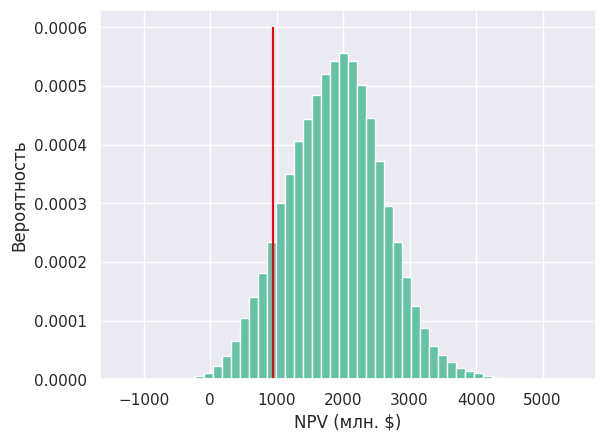

In [45]:
n = 25
days = 365
c = 0.07
lim = 100.0 # тыс. баррелей
cost = 200.0 # млн. $
t = 100000
T_max = 1000

k = np.random.normal(loc=0.42, scale=0.012, size=(t, ))
q = np.random.normal(loc=10.0, scale=3.0, size=(t, n))
i = np.random.normal(loc=0.1, scale=0.012, size=(t, ))
C = sps.triang.rvs(loc=90, c=1/3, scale=30, size=(t, n))

qs = np.apply_along_axis(np.sum, 1, q)

npv = -np.apply_along_axis(np.sum, 1, C)

for t_cur in range(1, T_max + 1):
    Q = days * k * qs * np.exp(-0.008 * n * (t_cur - 1))
    npv[np.where(Q >= lim)] += (c * Q / ((1 + i) ** (t_cur - 1)) - cost)[np.where(Q >= lim)]

print('x =', np.percentile(npv, 10))
print('Mean:', np.average(npv))
print('P(NPV > 0) =', np.where(npv > 0)[0].shape[0] / npv.shape[0])
plt.hist(npv, bins=50, density=True)
plt.vlines(np.percentile(npv, 10), 0, 6e-4, color='red')
plt.xlabel('NPV (млн. $)')
plt.ylabel('Вероятность')
plt.show()

**Вывод:** 0.1-квантиль распределения NPV равен 950,5 млн. долларов при среднем значении 1,88 млрд. долларов. NPV будет положительна почти всегда (с вероятностью 99,8%). В данном раскладе проект видится выгодным.